# Initial Notes about Musical Visuals

Code from: https://www.33rdsquare.com/visualizing-sounds-librosa/

To put audio over: https://docs.manim.community/en/stable/guides/add_voiceovers.html. This is only for AI generated speech but we can see..

In [2]:
import librosa
import numpy as np
import pandas as pd

In [91]:
audio_file = "song.wav"
y, sr = librosa.load(audio_file)

In [78]:
y

array([-9.0949470e-13, -1.1937118e-12, -1.5063506e-12, ...,
        5.6310864e-03,  4.6983659e-03,  1.6910126e-03], dtype=float32)

In [76]:
y.shape

(404260,)

In [74]:
sr

22050

In [80]:
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
tempo

array([129.19921875])

Let's check: https://tunebat.com/Info/Here-Comes-The-Sun-Remastered-2009-The-Beatles/6dGnYIeXmHdcikdzNNDMm2

This gives the time stamps for every time there is a "beat event"

In [83]:
beat_times = librosa.frames_to_time(beat_frames, sr=sr)
beat_times

array([ 0.58049887,  1.04489796,  1.4860771 ,  1.97369615,  2.41487528,
        2.87927438,  3.34367347,  3.80807256,  4.27247166,  4.73687075,
        5.20126984,  5.66566893,  6.10684807,  6.57124717,  7.03564626,
        7.50004535,  7.96444444,  8.42884354,  8.89324263,  9.38086168,
        9.82204082, 10.28643991, 10.750839  , 11.19201814, 11.63319728,
       12.12081633, 12.56199546, 12.97995465, 13.39791383, 13.81587302,
       14.2338322 , 14.67501134, 15.11619048, 15.58058957, 16.04498866,
       16.50938776, 16.97378685, 17.41496599])

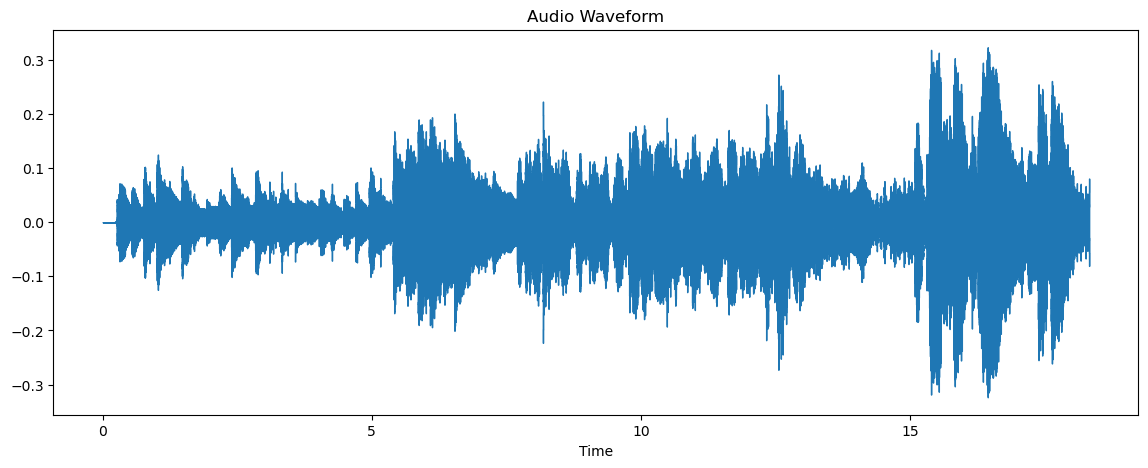

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)
plt.title("Audio Waveform")
plt.show()

In [92]:
y_harm, y_perc = librosa.effects.hpss(y)

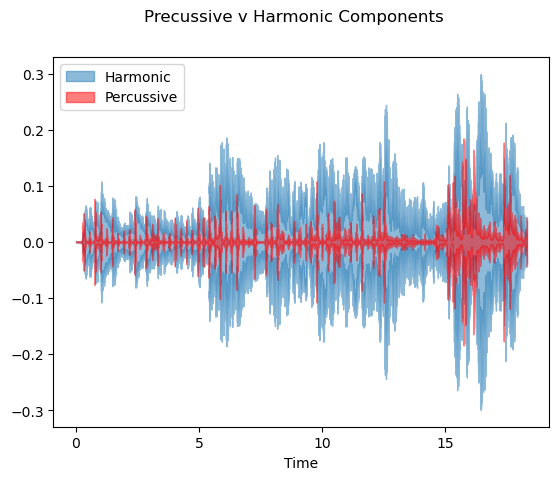

In [25]:
librosa.display.waveshow(y_harm, sr=sr, alpha=0.5, label='Harmonic')
librosa.display.waveshow(y_perc, sr=sr, color='r', alpha=0.5, label='Percussive')
plt.legend()
plt.suptitle("Precussive v Harmonic Components");

In [ ]:
from IPython.display import Audio

In [96]:
Audio(data=y_perc, rate=sr)

In [94]:
Audio(data=y_harm, rate=sr)

In [95]:
Audio(data=y_perc+y_harm,rate=sr)

## Graphs

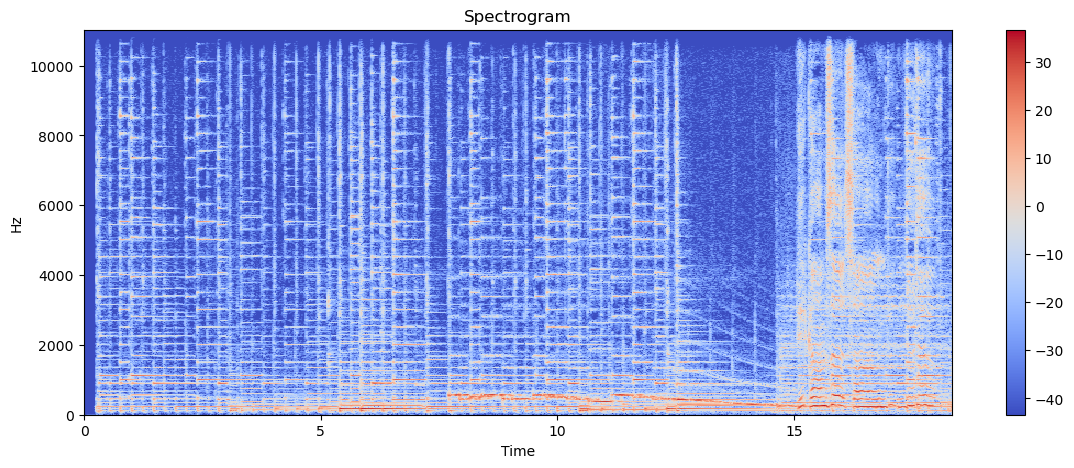

In [19]:
spectrogram = librosa.stft(y) 
S_db = librosa.amplitude_to_db(abs(spectrogram))

plt.figure(figsize=(14, 5))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()
plt.title('Spectrogram')
plt.show()

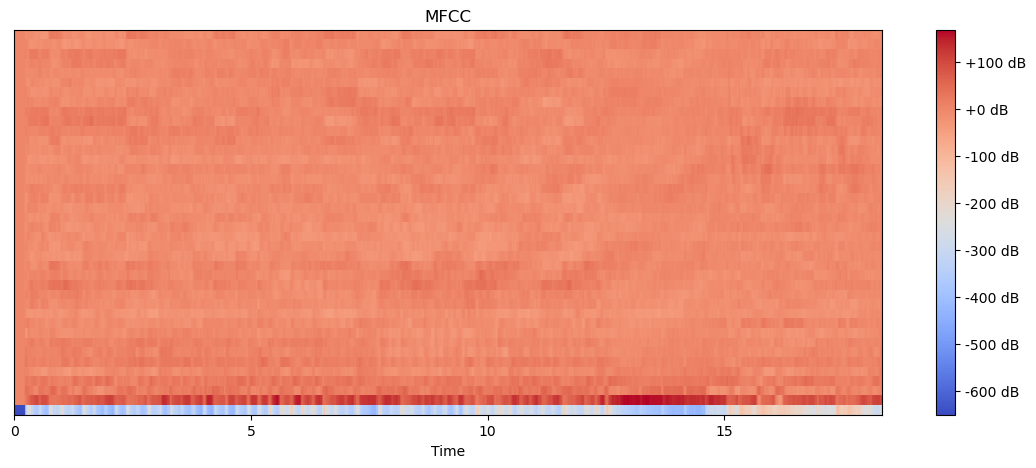

In [20]:
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)

plt.figure(figsize=(14, 5))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('MFCC')
plt.show()

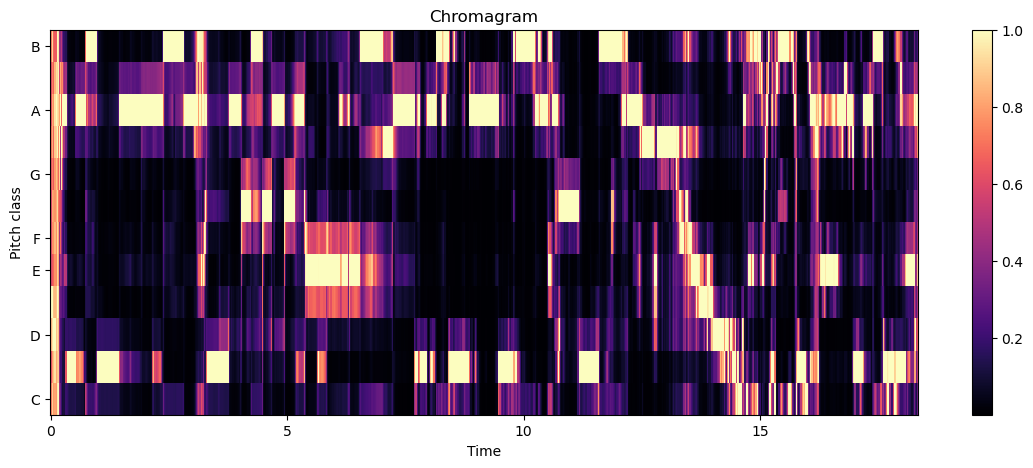

In [21]:
chroma = librosa.feature.chroma_stft(y=y, sr=sr) 

plt.figure(figsize=(14, 5)) 
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.show()

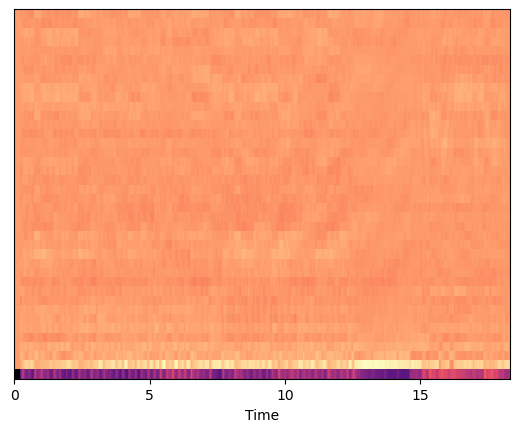

In [22]:
librosa.display.specshow(mfccs, x_axis='time', cmap='magma')